In [61]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

### Q4 Do users or critics rate a specific platform or genre higher than others?
+ For each platform/genre get average ratings
+ Get the average of these averages
+ Compare each with that average

## 1- Expectations: 

#### No, users or critics should not be biased towards a specific platform or genre.

## 2- Data Collection: 
    

In [62]:
ds = read_data(kind='dataset')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [63]:
# User_Score is object ?? fix that
print(ds['User_Score'].unique())
ds['User_Score'] = pd.to_numeric(ds['User_Score'], errors='coerce')
print(ds['User_Score'].unique())

# also multiply by 10 to normalize with Critic_Score
ds['User_Score'] = ds['User_Score'] * 10
print(ds['User_Score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
[80. nan 83. 85. 66. 84. 86. 77. 63. 74.

#### Filter relevant columns

In [64]:
## We can see that question is actually 4 questions not a single one
## so we will handle them simultaneously

# 1. Users against Platform
# 2. Users against Genre
# 3. Critics against Platform
# 4. Critics against Genre

# dataset
dfs = [ds.copy() for _ in range(4)]
# labels
lbls = ['Platform', 'Genre', 'Platform', 'Genre']
# columns
cols = ['User_Score', 'User_Score', 'Critic_Score', 'Critic_Score']

In [65]:
## Now Filter the data
## cols_to_keep
cols_to_keep = [['Platform', 'User_Score', 'User_Count'],
                ['Genre', 'User_Score', 'User_Count'],
                ['Platform', 'Critic_Score', 'Critic_Count'],
                ['Genre', 'Critic_Score', 'Critic_Count']]
# filter
for i in range(4):
    dfs[i] = dfs[i][cols_to_keep[i]]
    # dfs[i] = dfs[i].dropna()
    # dfs[i] = dfs[i].reset_index(drop=True)
    # dfs[i] = dfs[i].astype({'User_Score': 'float64', 'Critic_Score': 'float64'})
    # dfs[i] = dfs[i].astype({'User_Count': 'int64', 'Critic_Count': 'int64'})
    print(dfs[i].head(2))

  Platform  User_Score  User_Count
0      Wii        80.0       322.0
1      NES         NaN         NaN
      Genre  User_Score  User_Count
0    Sports        80.0       322.0
1  Platform         NaN         NaN
  Platform  Critic_Score  Critic_Count
0      Wii          76.0          51.0
1      NES           NaN           NaN
      Genre  Critic_Score  Critic_Count
0    Sports          76.0          51.0
1  Platform           NaN           NaN


#### Handle Missing Values


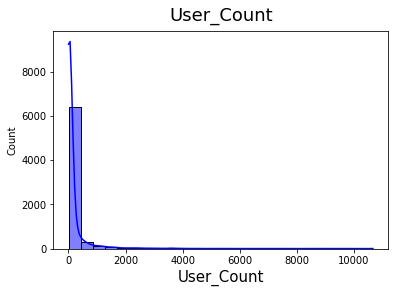

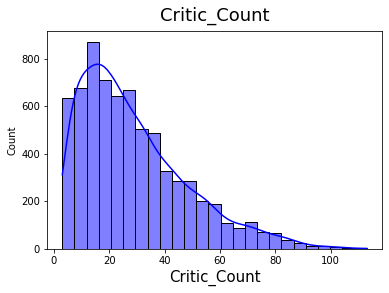

In [66]:
# Analyze User_Count and Critic_Count columns
dff = ds.copy()
dff = dff[['User_Count', 'Critic_Count']]
dff = dff.dropna()
plt_hist(df=dff, col='User_Count', title='User_Count')
plt_hist(df=dff, col='Critic_Count', title='Critic_Count')

In [67]:
# Print different counts for different thresholds

def print_horizontal_bar(x, y, title):
    print(title+'\n' +'-'*len(title))
    N = max([len(str(i)) for i in x])
    N = max(N, max([len(str(i)) for i in y]))
    N += 5
    pad='-'*N+'+'
    #
    print(''.join([f' >= {i}'.ljust(N)+'|' for i in x]))
    print(pad*len(x))
    print(''.join([f' {i}'.ljust(N) +'|' for i in y]))
    print()

User_Count_N = [0, 10, 30, 60, 70, 100, 500]
Critic_Count_N = [0, 10, 30, 35, 40, 50, 70]

lst1 = [dff[dff['User_Count'] > i].shape[0] for i in User_Count_N]
lst2 = [dff[dff['Critic_Count'] > i].shape[0] for i in Critic_Count_N]

print_horizontal_bar(User_Count_N, lst1, 'User_Count')
print_horizontal_bar(Critic_Count_N, lst2, 'Critic_Count')

User_Count
----------
 >= 0    | >= 10   | >= 30   | >= 60   | >= 70   | >= 100  | >= 500  |
---------+---------+---------+---------+---------+---------+---------+
 7017    | 5342    | 3278    | 2218    | 2038    | 1629    | 537     |

Critic_Count
------------
 >= 0    | >= 10   | >= 30   | >= 35   | >= 40   | >= 50   | >= 70   |
---------+---------+---------+---------+---------+---------+---------+
 7017    | 5891    | 2665    | 2097    | 1672    | 987     | 285     |



In [68]:
USERS_TH = 70
CRITICS_TH = 35
L1 = ['User_Count', 'Critic_Count']
L2 = [USERS_TH, CRITICS_TH]
# Filter Credible Counts
for i, df in enumerate(dfs):
    # also drop user_count and critic_count
    for col, TH in zip(L1, L2):
        if col in df.columns:
            df = df[df[col] >= TH].drop([col], axis=1)
    #
    print(df.columns, df.shape)
    # No more nulls!
    print(df.isna().sum().sum())
    # python yess
    dfs[i] = df
#
print(dfs[0].shape)

Index(['Platform', 'User_Score'], dtype='object') (2099, 2)
0
Index(['Genre', 'User_Score'], dtype='object') (2099, 2)
0
Index(['Platform', 'Critic_Score'], dtype='object') (2205, 2)
0
Index(['Genre', 'Critic_Score'], dtype='object') (2205, 2)
0
(2099, 2)


## Analysis

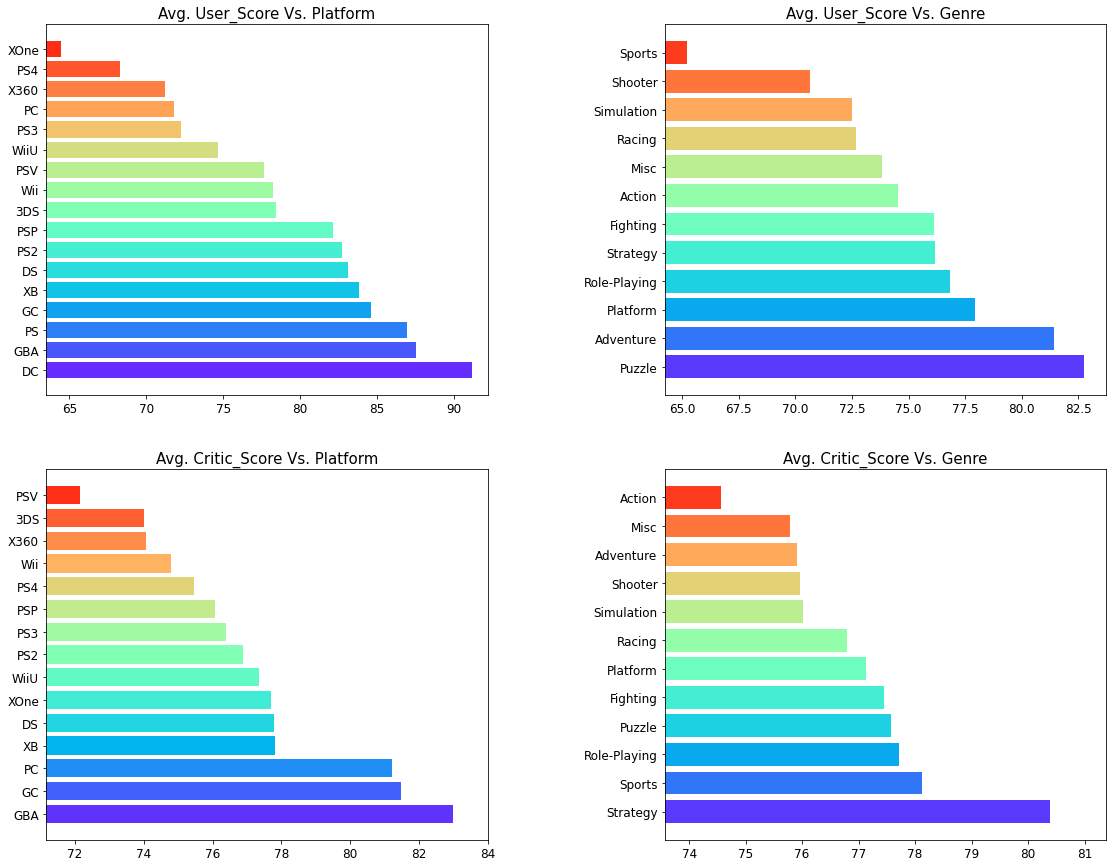

In [69]:
# Do all Questions simultaneously
fig = plt.figure(figsize=(19, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(4):
    df = dfs[i].groupby(lbls[i]).mean()
    df = df.sort_values(by=cols[i], ascending=False)
    df = df.reset_index()
    X = df[lbls[i]]
    Y = df[cols[i]]
    #
    ax = fig.add_subplot(2, 2, i+1)
    ax.barh(X, Y, color=sns.color_palette('rainbow', len(df)), label=cols[i])
    ax.set_title(f'Avg. {cols[i]} Vs. {lbls[i]}', fontsize=15)
    # black borders
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    # larger fonts
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # change bounds of x axis
    plt.xlim(Y.min() -1, Y.max() +1)


## Hypothesis Test
     Use T-test to test the relationship between a numerical variable (User/Critic Score)
     and a categorical variable (Platform / Genre) we want to test if ther really exists
     bias in scoring.
     
   - null hypothesis: Bias doesn't exist, Platform/Genre doesn't affect the score
     
   - alternative hypothesis: Bias exists, Platform/Genre does affect the score

In [80]:
# Use Two-Sample T-Test to check if there is a significant difference between
# the means of two groups, ex. score(platform1) and score(platform2)
# H0: mu1 = mu2
# H1: mu1 != mu2
# alpha = 0.05
# if p-value < alpha then reject H0
# if p-value > alpha then fail to reject H0

# Two-Sample T-Test
from scipy.stats import ttest_ind

def ttest(df, col, lbl):
    # get unique labels
    labels = df[lbl].unique()
    # get data
    data = [df[df[lbl] == label][col] for label in labels]
    # ttest each pair
    # get worst p-value
    p = 1
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            tij, pij = ttest_ind(data[i], data[j])
            # print(f'p-value for {labels[i]} Vs. {labels[j]} = {p}')
            if pij < p:
                t, p, label1, label2 = tij, pij, labels[i], labels[j]
    # t, p = ttest_ind(data[0], data[1])
    # print
    # print(f'p-value for {col} Vs. {lbl} = {p}')
    return t, p, label1, label2

# Do all Questions simultaneously
for i in range(4):
    df = dfs[i]
    t, p, label1, label2 = ttest(df, cols[i], lbls[i])
    #
    print(f'For {cols[i]} Vs. {lbls[i]}:')
    print(f'worst value when comparing {label1} Vs. {label2}')
    print(f'p-value = {p:.6f}')
    print(f't-statistic  = {t:.6f}')
    if p < 0.05:
        print('Reject H0')
    else:
        print('Fail to reject H0')
    print('-'*50)


For User_Score Vs. Platform:
worst value when comparing PS2 Vs. XOne
p-value = 0.000000
t-statistic  = 12.448478
Reject H0
--------------------------------------------------
For User_Score Vs. Genre:
worst value when comparing Sports Vs. Role-Playing
p-value = 0.000000
t-statistic  = -9.198338
Reject H0
--------------------------------------------------
For Critic_Score Vs. Platform:
worst value when comparing X360 Vs. PC
p-value = 0.000000
t-statistic  = -7.510106
Reject H0
--------------------------------------------------
For Critic_Score Vs. Genre:
worst value when comparing Action Vs. Strategy
p-value = 0.000022
t-statistic  = -4.274801
Reject H0
--------------------------------------------------


In [75]:
## Anova Test
from scipy.stats import f_oneway

# compare all at once
def anova(df, col, lbl):
    # get unique labels
    labels = df[lbl].unique()
    # get data
    data = [df[df[lbl] == label][col] for label in labels]
    # anova
    f, p = f_oneway(*data)
    # print
    # print(f'p-value for {col} Vs. {lbl} = {p}')
    return f, p

# Do all Questions simultaneously
for i in range(4):
    df = dfs[i]
    f, p = anova(df, cols[i], lbls[i])
    #
    print(f'p-value for {cols[i]} Vs. {lbls[i]} = {p:.6f}')
    print(f'f-statistic for {cols[i]} Vs. {lbls[i]} = {f:.6f}')
    if p < 0.05:
        print('Reject H0')
    else:
        print('Fail to reject H0')
    print('-'*50)
    

p-value for User_Score Vs. Platform = 0.000000
f-statistic for User_Score Vs. Platform = 22.717727
Reject H0
--------------------------------------------------
p-value for User_Score Vs. Genre = 0.000000
f-statistic for User_Score Vs. Genre = 13.716004
Reject H0
--------------------------------------------------
p-value for Critic_Score Vs. Platform = 0.000000
f-statistic for Critic_Score Vs. Platform = 7.029572
Reject H0
--------------------------------------------------
p-value for Critic_Score Vs. Genre = 0.000049
f-statistic for Critic_Score Vs. Genre = 3.586431
Reject H0
--------------------------------------------------


## 3- Interpretation of Results

#### We can say with absolute confidence that H0 was wrong and that Bias does exist.  
#### That is, *Users* and *Critics* are biased towards specific *Platforms* and *Genres*.